# World Happiness Report EDA

The World Happiness Report is a publication that contains the rankings of national happiness of different countries, which is known as the Happiness Score or Subjective Well-being.

The Happiness Score is measured as a result of the national average response to the question "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life
for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this
time?”


There are six other metrics that are also measured along with the happiness score: real GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. These factors may correlate with the Happiness Score.


## Load the Libraries



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Load the Data

We are using the world happiness report for the years 2006-2022. The data can be found at https://worldhappiness.report/data/. We are also going to use the world happiness report for 2021 and do some of our analysis on that.

We load the data using the pd.read_csv() function.

In [3]:
df = pd.read_excel("/content/whi.xls")

In [4]:
df_2021 = pd.read_csv("world-happiness-report-2021.csv")

In [5]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [6]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

## Variable Definitions

The variables in our dataset include the following:

- Life Ladder: this is the Happiness Score for a country. It answers the question "Please imagine a ladder, with steps numbered from 0 at the
bottom to 10 at the top. The top of the ladder represents the best possible life
for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this
time?” The answer is on a scale of 0-10.
- Log GDP per Capita: GDP per Capita shows the country's GDP divided by its total population. We take log of this because it is easier to plot in our analysis.
- Healthy Life Expectancy at Birth: shows the average life expectancy for the country
- Social Support: this is the national average of the binary responses to the question "If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?"
- Freedom to make life choices: this is the national average of responses to the GWP
question “Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?”
- Generosity: this is the residual of regressing national average of response to the GWP
question “Have you donated money to a charity in the past month?” on GDP
per capita
- Perception of Corruption: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?” The overall perception is just the average of the two 0-or-1 responses.


So, for example, one row in the dataset would represent the Life ladder score and values for the other metrics for that specific country for that year.

## Drop Irrelevant Columns

Since we aren't going to use the columns "Positive affect" and "Negative affect" in this analysis, we can remove them:

In [7]:
df.drop(["Positive affect", "Negative affect"], axis=1, inplace=True)

In [8]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620


In [9]:
df.shape

(2199, 9)

There are 9 columns, and 2199 data points in the dataset.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2199.0,2014.161437,4.718736,2005.000000,2010.000000,2014.000000,2018.000000,2022.000000
Life Ladder,2199.0,5.479226,1.125529,1.281271,4.646750,5.432437,6.309460,8.018934
Log GDP per capita,2179.0,9.389766,1.153387,5.526723,8.499764,9.498955,10.373216,11.663788
Social support,2186.0,0.810679,0.120952,0.228217,0.746609,0.835535,0.904792,0.987343
Healthy life expectancy at birth,2145.0,63.294583,6.901104,6.720000,59.119999,65.050003,68.500000,74.474998
Freedom to make life choices,2166.0,0.747858,0.140150,0.257534,0.656528,0.769821,0.859382,0.985178
Generosity,2126.0,0.000096,0.161083,-0.337527,-0.112116,-0.022671,0.092070,0.702708
Perceptions of corruption,2083.0,0.745195,0.185837,0.035198,0.688139,0.799654,0.868827,0.983276


## Data Cleaning

- We check for missing values and remove them


In [11]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

## Finding the Correlations

We now want to determine if there is any relationship between the other 6 factors (e.g. Social Support, Generosity, etc.) and our Happiness Score. To do so, we create a correlation matrix:

<ipython-input-13-28dc33e66b1b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


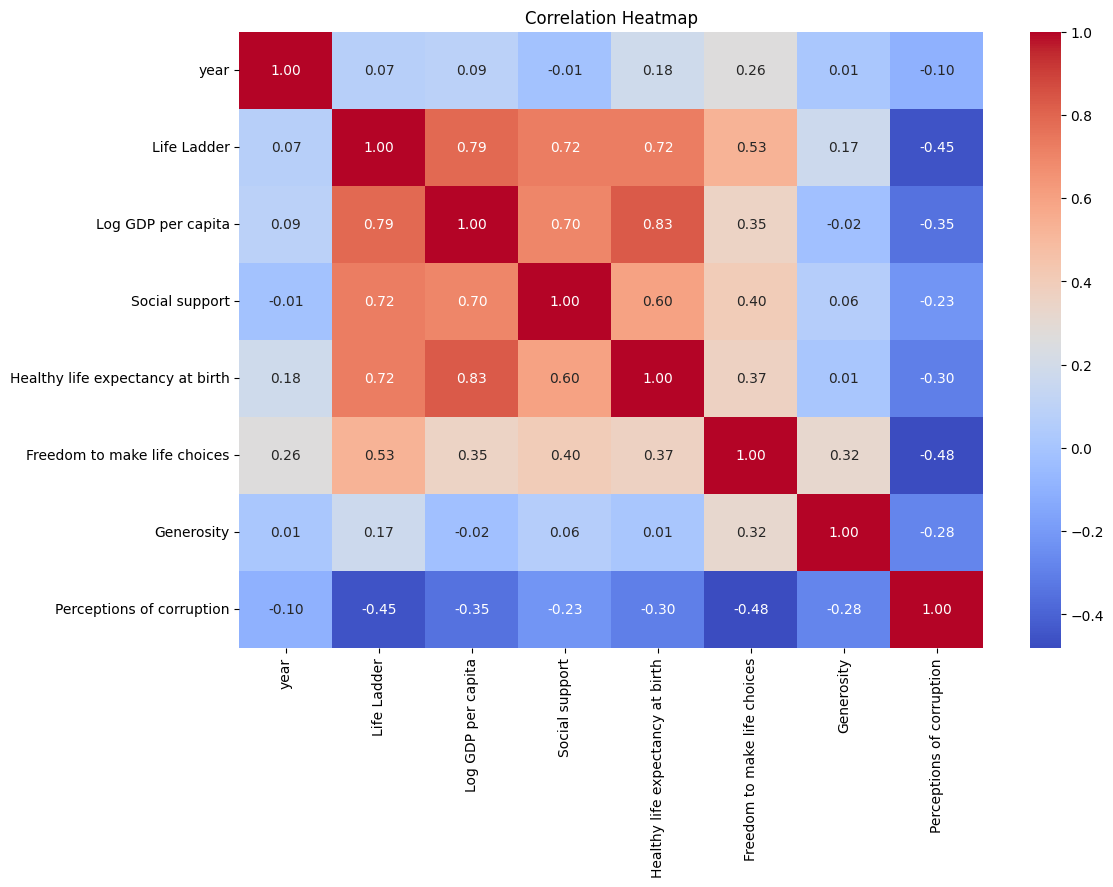

In [13]:
# to find the correlation between life ladder and other variables. Which factor plays most in making countries happy

correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

From this graph we can deduce that

- Generosity has a low correlation with Life Ladder. We can even see in the above code that the top 5 happiest countries have very low Generosity scores. While this means there is no linear relationship between the two, but that doesn't necessarily rule out a relationship between them altogether. There may be a non-linear or some other type of relationship between the two.  
- Log GDP per Capita, Social Support, and Healthy Life Expectancy have a strong positive correlation with Life Ladder
- There is a negative correlation between Perceptions of corruption and Ladder score.

## Which Country was still the happiest when COVID-19 struck in 2020?

To answer this question, we extract all the rows where the year was 2020 and find the top 5 highest scoring countries for "Life Ladder" in that year:

In [14]:
#Which Country was still the happiest in 2020 when covid struck?
df_2020 = df[df["year"]==2020]
top_5_life_ladder = df_2020.sort_values(by=["Life Ladder"], ascending=False).head(5)

In [15]:
top_5_life_ladder

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
635,Finland,2020,7.889350,10.767303,0.961621,71.074997,0.962424,-0.121018,0.163636
828,Iceland,2020,7.575490,10.862350,0.983286,72.025002,0.948627,0.153188,0.644064
519,Denmark,2020,7.514631,10.924474,0.947371,71.125000,0.937932,0.046844,0.213842
1875,Switzerland,2020,7.508435,11.137072,0.946316,72.699997,0.917343,-0.072108,0.280367
1393,Netherlands,2020,7.504448,10.901819,0.943956,71.474998,0.934523,0.146807,0.280605


As we can see, Finland tops this list with the highest score of 7.89. Iceland, Denmark, Switzerland, and Netherlands follow close behind. These countries also have the highest Social Support and very high Life expectancy as well compared to other countries.



### Distribution of Ladder Scores by Region and Sub-region for all Years



In [18]:
continents = pd.read_csv("continents2.csv")

In [19]:
continents.drop(["alpha-2", "alpha-3", "country-code", "iso_3166-2", "intermediate-region","region-code", "sub-region-code", "intermediate-region-code"], axis=1, inplace=True)
continents.head()

continents_dict = {k:v for k,v in zip(continents["name"], continents["region"])}
df["Region"] = df["Country name"].map(continents_dict)
subregion_dict = {k:v for k,v in zip(continents["name"], continents["sub-region"])}

df["Sub Region"] = df["Country name"].map(subregion_dict)



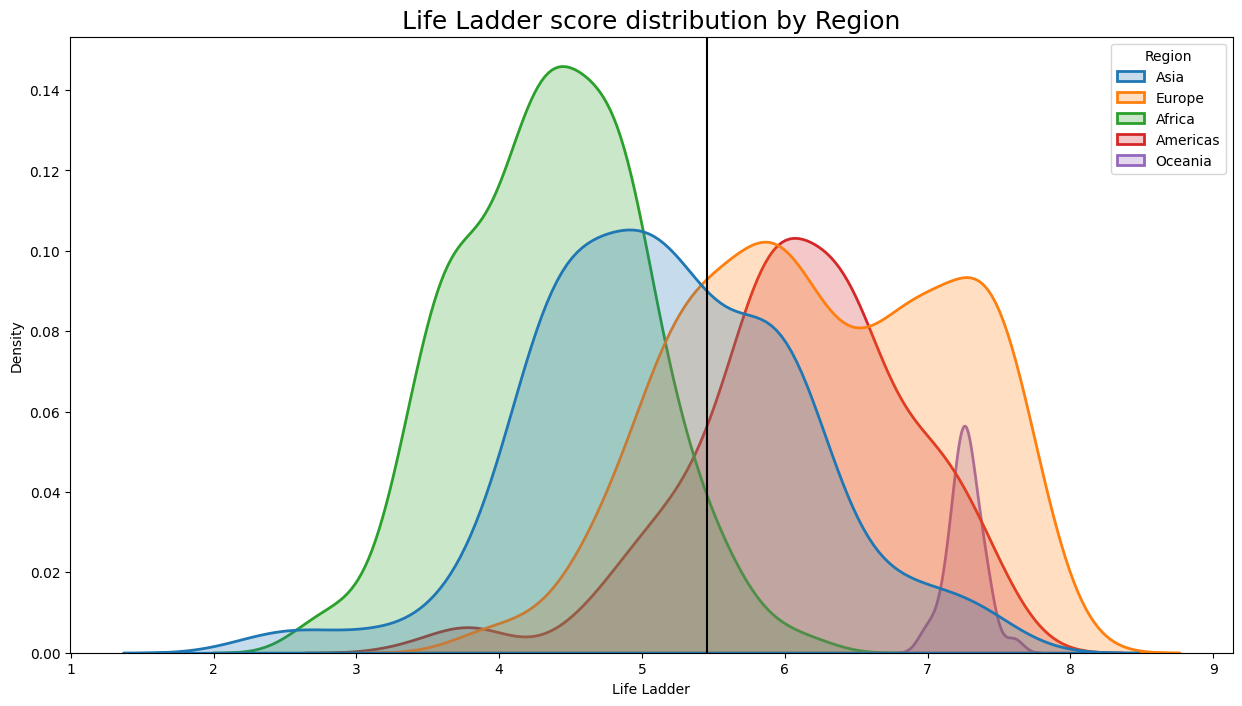

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.kdeplot(data=df, x="Life Ladder", hue="Region", fill=True, linewidth=2)
plt.axvline(df['Life Ladder'].mean(), c='black')
plt.title("Life Ladder score distribution by Region", fontsize=18)
plt.show()

Here, we can see that Oceania has the highest life ladder scores on average and the lowest scores are in Africa. Europe also has high scores.
Let's drill down by sub region to get a more detailed picture:

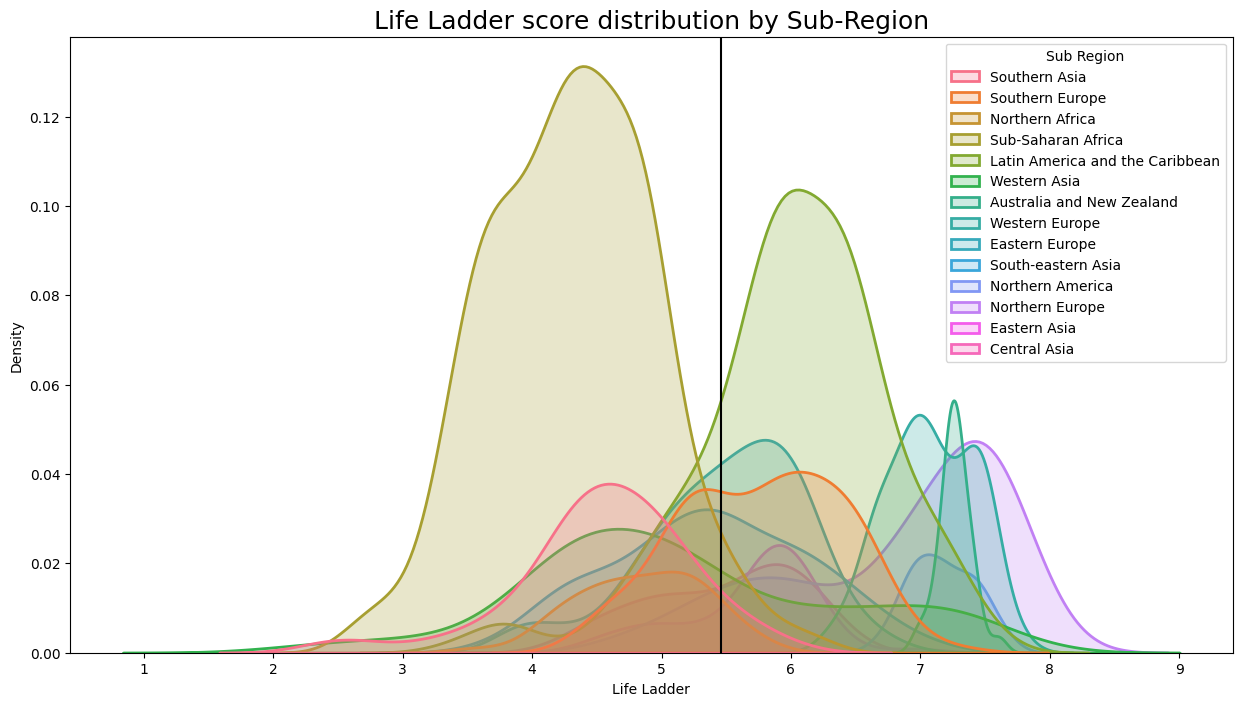

In [22]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df, x="Life Ladder", hue="Sub Region", fill=True, linewidth=2)
plt.axvline(df['Life Ladder'].mean(), c='black')
plt.title("Life Ladder score distribution by Sub-Region", fontsize=18)
plt.show()

Northern Europe, Western Europe, South-eastern Asia, and Australia/New Zealand are doing very well w.r.t Happiness Scores.

## Happiness Scores for 2021

In [17]:
top_5_life_ladder_2021 = df_2021.sort_values(by=["Ladder score"], ascending=False).head(5)
top_5_life_ladder_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


These countries still rank the highest in happiness in 2021.

### Distribution of Ladder Scores by region for 2021

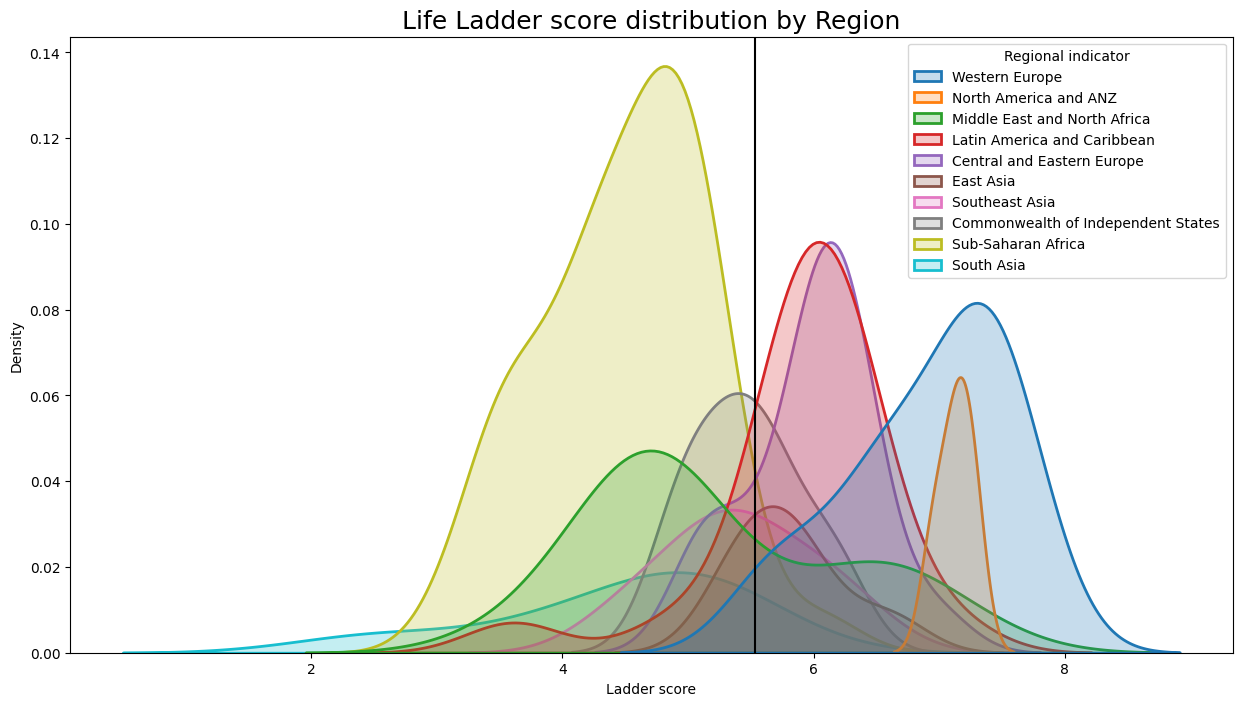

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.kdeplot(data=df_2021, x="Ladder score", hue="Regional indicator", fill=True, linewidth=2)
plt.axvline(df_2021['Ladder score'].mean(), c='black')
plt.title("Life Ladder score distribution by Region", fontsize=18)
plt.show()

We can see that trends are generally the same over the years

## Which were the top 10 highest scoring countries over the years?

In [32]:
df_mean_ll = df_2021.groupby("Country name")["Ladder score"].mean()
top_10 = df_mean_ll.sort_values(ascending=False).head(10)
top_10

Country name
Denmark        7.651834
Finland        7.619146
Norway         7.481820
Switzerland    7.474483
Netherlands    7.451193
Iceland        7.450396
Sweden         7.377318
Canada         7.313776
New Zealand    7.278497
Israel         7.271417
Name: Life Ladder, dtype: float64

## Which were the top 10 lowest scoring countries?

In [33]:
bottom_10 = df_mean_ll.sort_values(ascending=True).head(10)
bottom_10

Country name
Afghanistan                 3.505506
Central African Republic    3.514954
Burundi                     3.548124
Rwanda                      3.603543
Togo                        3.661006
Tanzania                    3.691510
Zimbabwe                    3.805361
Comoros                     3.886998
Yemen                       3.932129
Botswana                    3.953261
Name: Life Ladder, dtype: float64

# Happiness Report for Pakistan

Now I want to do analysis on Pakistan's Happiness data. For this, I create a new dataset containing all the entries where country name = Pakistan:

In [25]:
pk = df[df["Country name"]=="Pakistan"]

In [26]:
pk.head(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Sub Region
1487,Pakistan,2007,5.671461,8.314321,0.478887,53.720001,0.395642,0.084207,0.793795,Asia,Southern Asia
1488,Pakistan,2008,4.413919,8.309402,0.372908,53.980000,0.335224,0.095418,0.847683,Asia,Southern Asia
1489,Pakistan,2009,5.208147,8.315034,0.521747,54.240002,0.387698,0.072142,0.873649,Asia,Southern Asia


## Data Visualization

### Pakistan's Ladder Score Over the Years

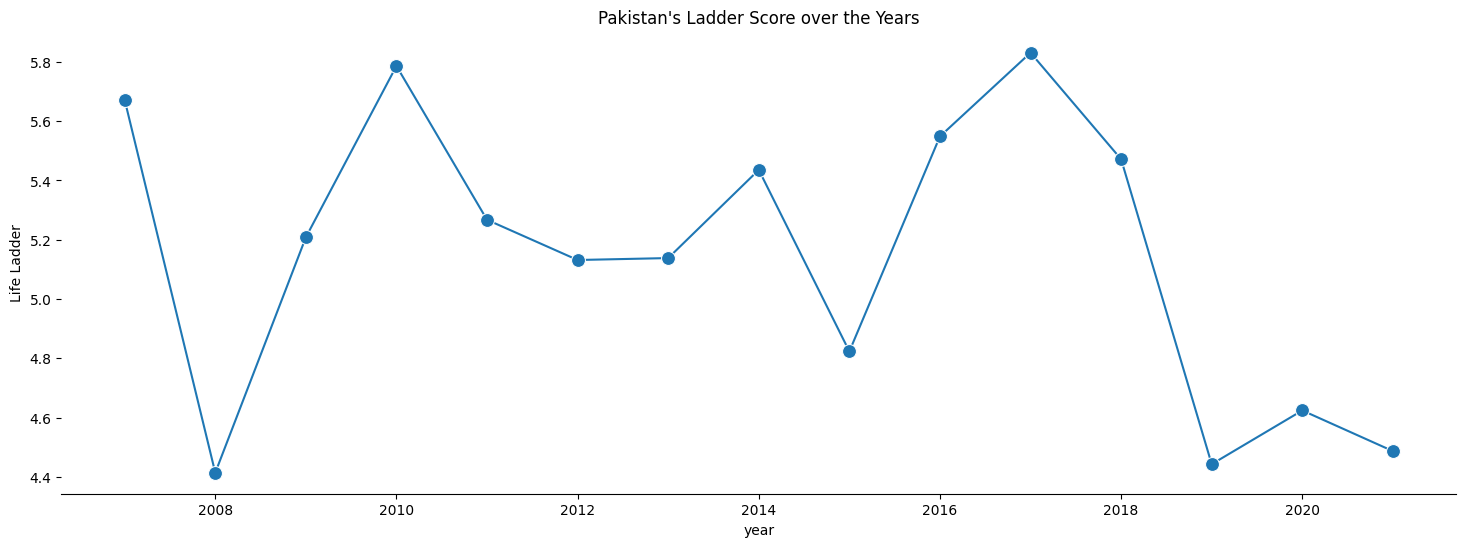

In [27]:
#plot each of the variables over the years to see trend
plt.figure(figsize=(18,6))
sns.lineplot(x="year", y="Life Ladder", data=pk, marker="o", markersize=10)
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title("Pakistan's Ladder Score over the Years")
plt.show()

Pakistan's Ladder Score has been fluctuating over the years. It hit a record low in 2008 and 2019, and was the highest in 2017. Surprisingly enough, the Ladder score increased in 2020 when the pandemic hit.

Let's see if any of the factors had anything to do with this increase.

### Pakistan's Healthy Life Expectancy at Birth Over the Years

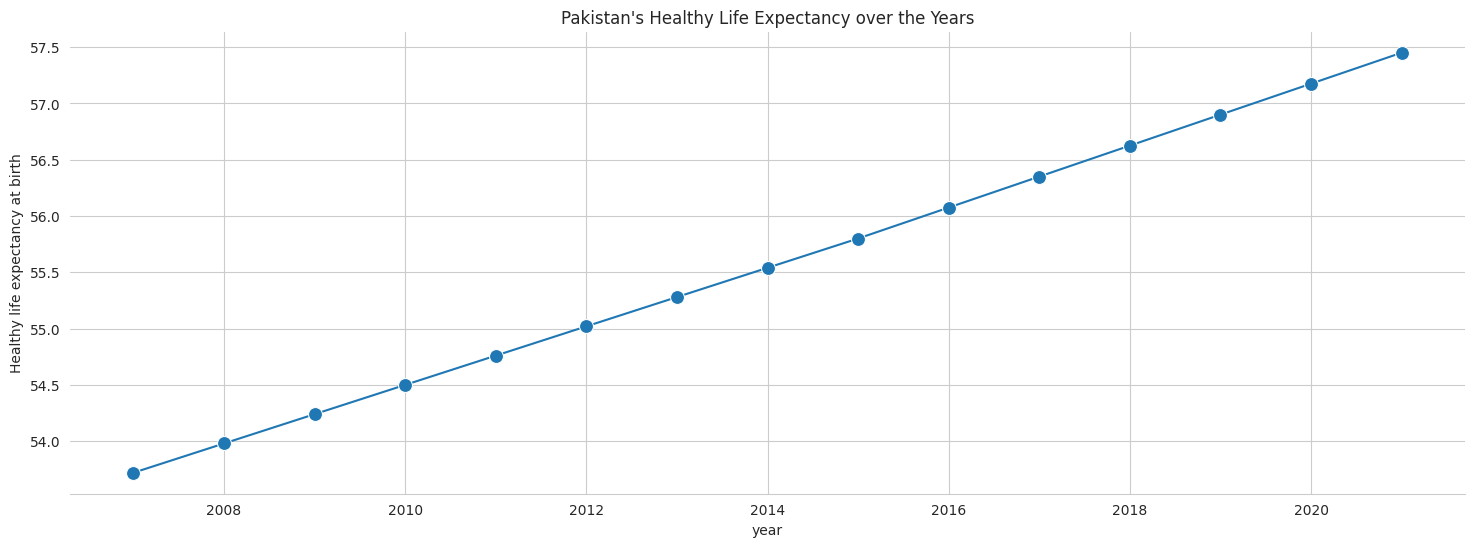

In [28]:
plt.figure(figsize=(18,6))
sns.lineplot(x="year", y="Healthy life expectancy at birth", data=pk, marker="o", markersize=10)
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title("Pakistan's Healthy Life Expectancy over the Years")
plt.show()

Pakistan's life expectancy has been on a continuous upward trend since 2007. This can be explained by the improved medical care over the years.

### Pakistan's GDP per Capita over the Years

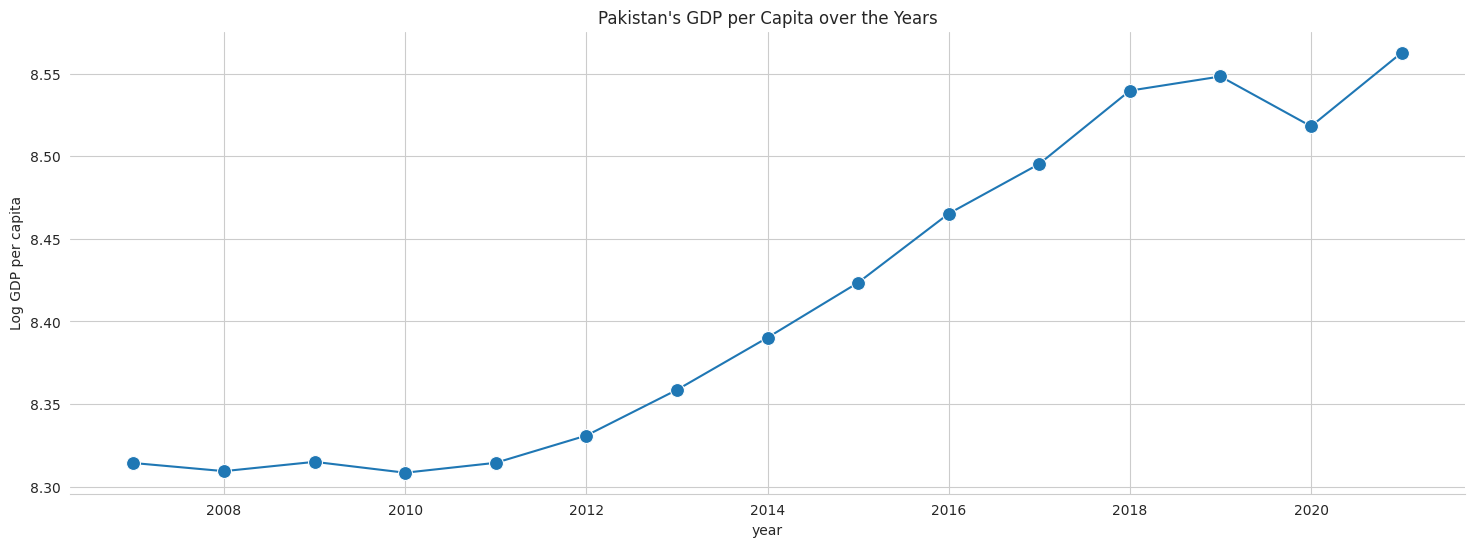

In [29]:
plt.figure(figsize=(18,6))
sns.lineplot(x="year", y="Log GDP per capita", data=pk, marker="o", markersize=10)
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title("Pakistan's GDP per Capita over the Years")
plt.show()

Pakistan's GDP per capita has also been steadily increasing over the years. It took a dip in 2020, which can be explained by COVID since most countries' economies took a hit because of it.

### Pakistan's Perception of Corruption over the Years

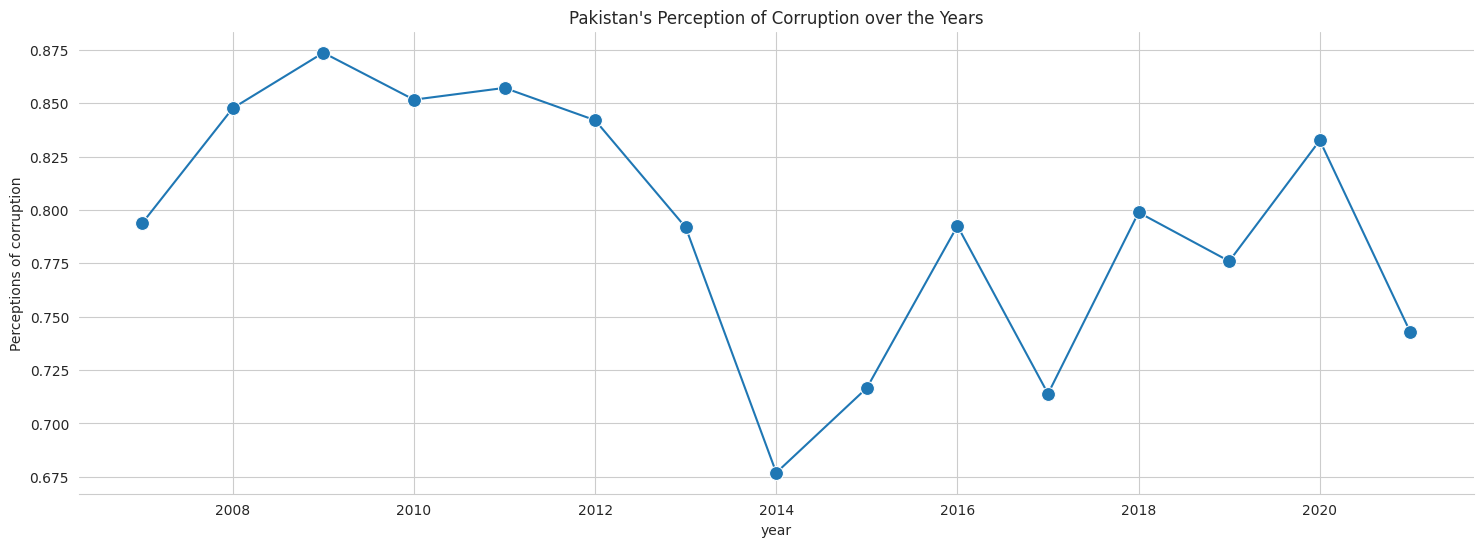

In [30]:
plt.figure(figsize=(18,6))
sns.lineplot(x="year", y="Perceptions of corruption", data=pk, marker="o", markersize=10)
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title("Pakistan's Perception of Corruption over the Years")
plt.show()

Pakistan's perception of corruption was highest in 2009 but has been pretty high for most years. As of 2021 it has decreased, which is a positive sign.

### Pakistan's Generosity over the Years

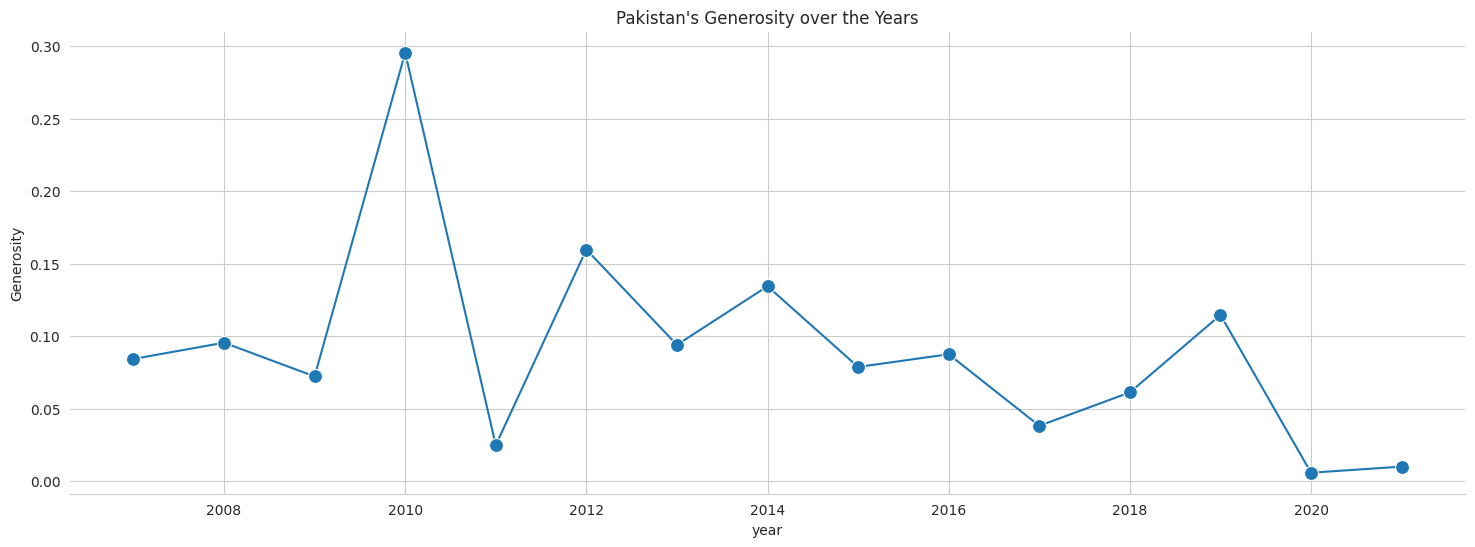

In [31]:
plt.figure(figsize=(18,6))
sns.lineplot(x="year", y="Generosity", data=pk, marker="o", markersize=10)
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title("Pakistan's Generosity over the Years")
plt.show()

Pakistan's generosity has also been decreasing over the years, being the lowest as of 2021.

### Pakistan's Social Support over the Years

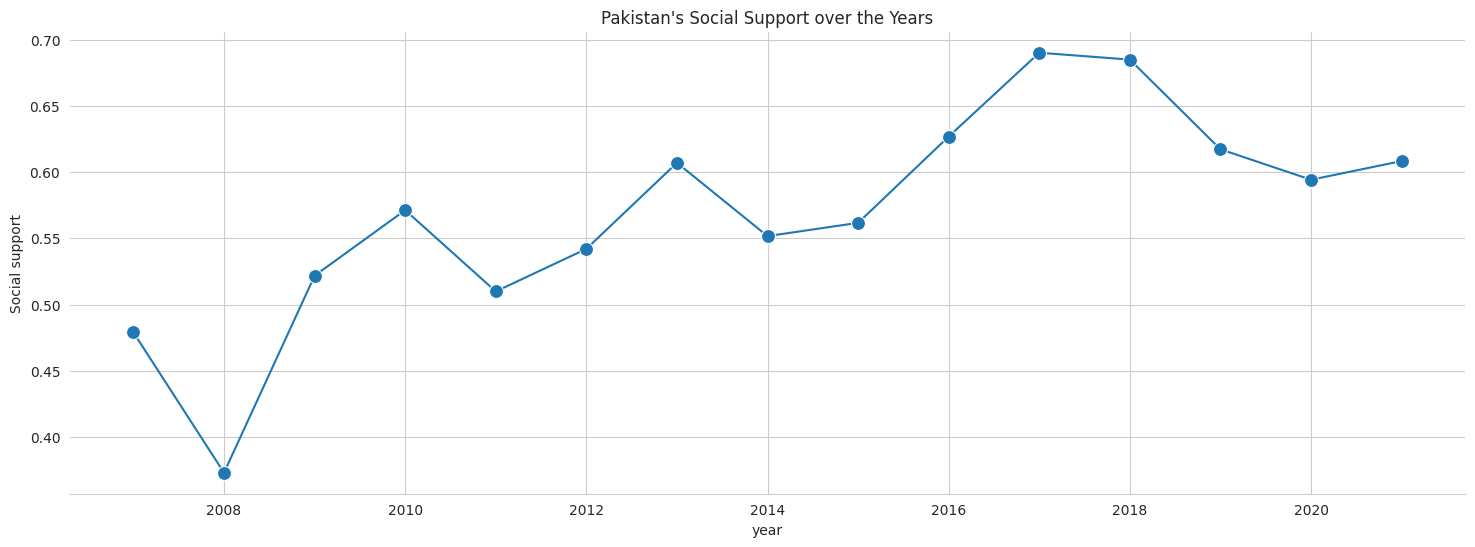

In [32]:
plt.figure(figsize=(18,6))
sns.lineplot(x="year", y="Social support", data=pk, marker="o", markersize=10)
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title("Pakistan's Social Support over the Years")
plt.show()

### Pakistan's Freedom to Make Life Choices over the Years

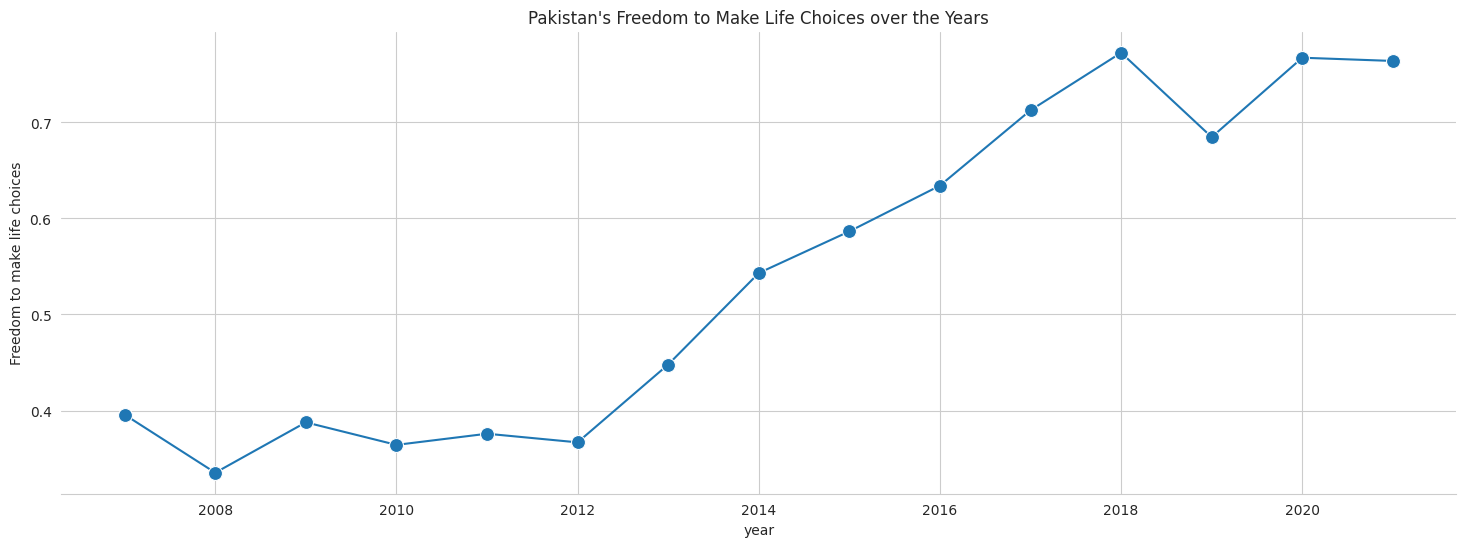

In [33]:
plt.figure(figsize=(18,6))
sns.lineplot(x="year", y="Freedom to make life choices", data=pk, marker="o", markersize=10)
sns.set_style("whitegrid")
sns.despine(left=True)
plt.title("Pakistan's Freedom to Make Life Choices over the Years")
plt.show()

It looks like this factor is the only one that really increased going from 2019 to 2020. It looks like Pakistanis saw their freedom to make life choices increase in 2020. The factor also shows an upward trend from 2012-2018.

### Analysis Results

It looks like almost all these factors decreased from 2019 to 2020, apart from Freedom to make Life choices. Despite this, Pakistanis' ladder score was higher in 2020 than 2019. They had a happier perception of the current position of their life.

## Pakistan and South Asia: Where do Pakistanis stand?

Where does Pakistan stand in the World Happiness ranking compared to the rest of South Asia? To find out, we create a seperate dataframe with South Asian countries and plot the mean of the Ladder score for each country.

Let's create the dataframe first:

In [34]:
# group south asian together

south_asian =["India", "Bangladesh", "Sri Lanka", "Nepal", "Pakistan", "Bhutan", "Malaysia", "Myanmar", "Singapore", "Afghanistan", "Thailand", "Laos"]

df_south_asian = df[df["Country name"].isin(south_asian)]
df_south_asian["Country name"].value_counts()



Bangladesh     17
Thailand       17
India          16
Nepal          16
Pakistan       15
Sri Lanka      15
Malaysia       14
Afghanistan    13
Singapore      13
Myanmar        10
Laos            9
Bhutan          3
Name: Country name, dtype: int64

### Missing values

Here, we can see that data for all the years is not available for each country. For example, for Bhutan there are only 3 entries. This means there is only data for three years available here. We can see that below:

In [35]:
df_south_asian[df_south_asian["Country name"]=="Bhutan"]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Sub Region
195,Bhutan,2013,5.569092,9.097065,0.818949,62.240002,0.810201,0.351611,0.802428,Asia,Southern Asia
196,Bhutan,2014,4.938578,9.143029,0.880342,62.419998,0.834222,0.266661,0.650338,Asia,Southern Asia
197,Bhutan,2015,5.082129,9.197989,0.847574,62.599998,0.830102,0.275951,0.633956,Asia,Southern Asia


As you can see above, we only have data for Bhutan for the years 2013, 2014, and 2015.

To solve this problem, we will drop the countries which have less than 10 entries. For the remaining countries with missing years, we will impute the values using interpolation. We drop the countries with less than 10 entries because if we impute the data too much, we may skew it.

In [36]:
#we want to drop the countries which have years' data < 10 available, and impute the other missing values. we
#choose to linearly interpolate the values

condition1 = df_south_asian["Country name"] == "Laos"

df_south_asian = df_south_asian[~condition1]


In [37]:
condition2 = df_south_asian["Country name"] == "Bhutan"

df_south_asian = df_south_asian[~condition2]

In [38]:
df_south_asian["Country name"].value_counts()

Bangladesh     17
Thailand       17
India          16
Nepal          16
Pakistan       15
Sri Lanka      15
Malaysia       14
Afghanistan    13
Singapore      13
Myanmar        10
Name: Country name, dtype: int64

We do a linear interpolation:

In [39]:
years_to_include = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

country_list = df_south_asian["Country name"].unique()
reference_df = pd.DataFrame([(country, year) for country in country_list for year in years_to_include], columns=['Country name', 'year'])

# Merge the reference DataFrame with your original DataFrame
merged_df = reference_df.merge(df_south_asian, on=['Country name', 'year'], how='left')

# Group the merged DataFrame by "country"
grouped = merged_df.groupby('Country name')

# Define a function to perform linear interpolation for each group
def interpolate_country(group):
    group['Life Ladder'] = group['Life Ladder'].interpolate(method='linear', limit_direction='both')
    return group

# Apply the interpolation function to each country group
df_imputed = grouped.apply(interpolate_country)

# Reset the index of the resulting DataFrame
df_imputed = df_imputed.reset_index(drop=True)


<ipython-input-39-5af5b8def75c>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_imputed = grouped.apply(interpolate_country)


In [40]:
df_imputed["Country name"].value_counts()

Afghanistan    17
Bangladesh     17
India          17
Malaysia       17
Myanmar        17
Nepal          17
Pakistan       17
Singapore      17
Sri Lanka      17
Thailand       17
Name: Country name, dtype: int64

Now we can see that all the values for missing years have been imputed, so now all countries have values for all 17 years from 2006-2022.

Now we can plot the mean of their ladder scores.

### Pakistan's Ladder Score vs South Asia

We want to see where Pakistan stands with regards to other South Asian countries in its Ladder Score.

For this, we calculate the mean of the Ladder Score for each country and then plot a bargraph.

Let's define a function that calculates mean of the scores for each country. We can reuse this function to calculate the means of the other factors as well.

In [49]:
def calculate_mean_and_sort(df, groupby_column, factor_column):

    # Calculate the mean of the factor grouped by the specified column
    mean_df = df.groupby(groupby_column)[factor_column].mean().reset_index()

    # Sort the values in descending order based on the mean
    mean_df = mean_df.sort_values(by=factor_column, ascending=False)

    # Reset the index
    mean_df = mean_df.reset_index(drop=True)

    return mean_df

In [50]:
southasia_mean = calculate_mean_and_sort(df_imputed, "Country name", "Life Ladder")

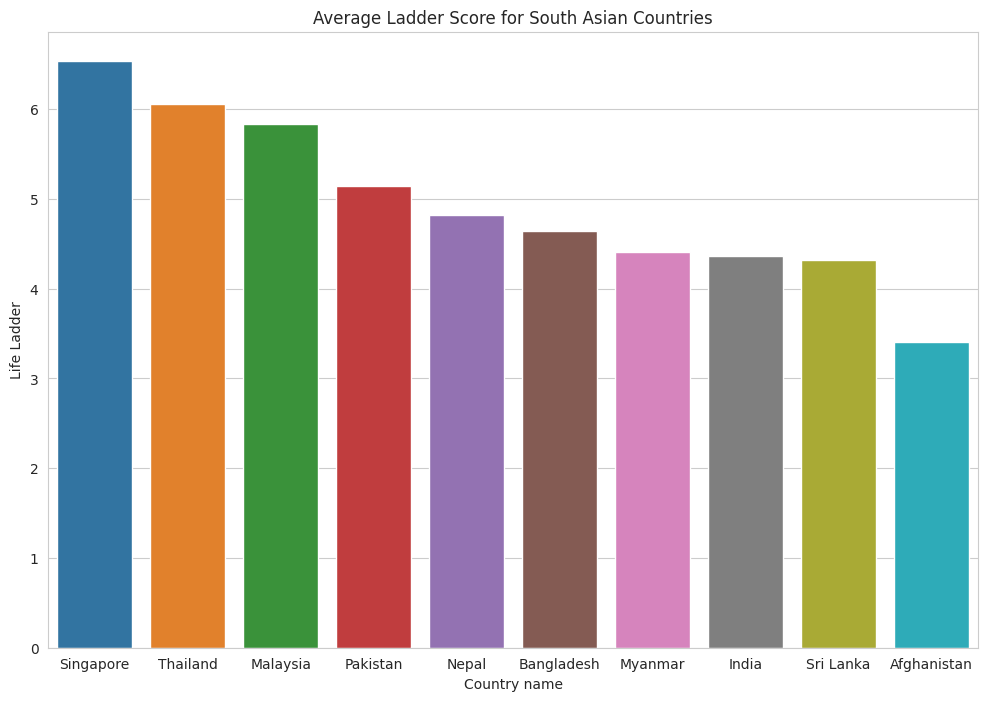

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(x="Country name",y="Life Ladder",data=southasia_mean)
plt.title("Average Ladder Score for South Asian Countries")
plt.show()

Pakistan's Ladder score ranks 4th compared to other South Asian countries. It is doing better than more than half of all South Asian countries when it comes to its perception of where they stand in life.

### Life Ladder Scores for South Asian Countries Over the Years

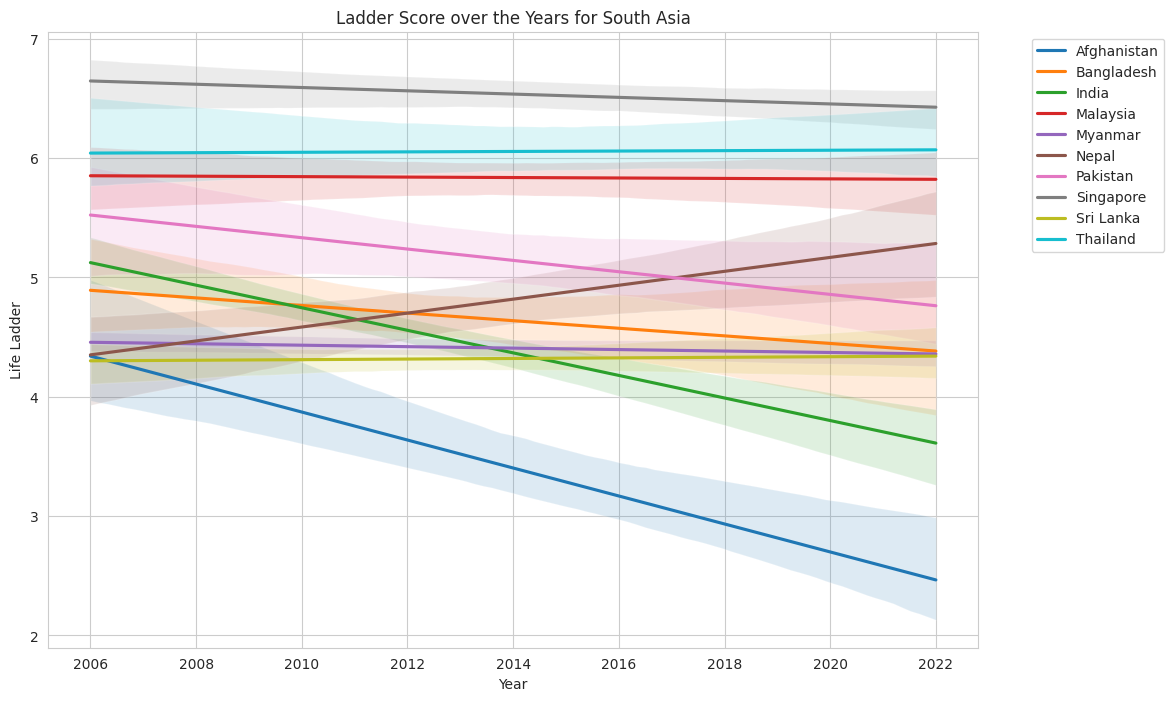

In [45]:
plt.figure(figsize=(12,8))

countries = df_imputed["Country name"].unique()

for country in countries:
  country_data = df_imputed[df_imputed["Country name"]==country]
  sns.regplot(x="year", y="Life Ladder", data=country_data, label=country, scatter=False)

plt.xlabel("Year")
plt.ylabel("Life Ladder")
plt.title("Ladder Score over the Years for South Asia")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

Analyzing the above graph, we can see that overall Afghanistan has the lowest life ladder scores in general, while Singapore has the overall highest scores. Nepal is the country that shows an upward trend of its ladder score over the years, while Thailand and Malaysia's scores remain constant throughout the years.

Now let's look at some other factors.

### Pakistan's Social Support vs South Asia

In [52]:
southasia_social_support_mean = calculate_mean_and_sort(df_imputed, "Country name", "Social support")

In [53]:
southasia_social_support_mean

,Country name,Social support
0,Thailand,0.888195
1,Singapore,0.878754
2,Sri Lanka,0.828656
3,Malaysia,0.822646
4,Nepal,0.773614
5,Myanmar,0.759611
6,India,0.598198
7,Bangladesh,0.587942
8,Pakistan,0.569299
9,Afghanistan,0.504086


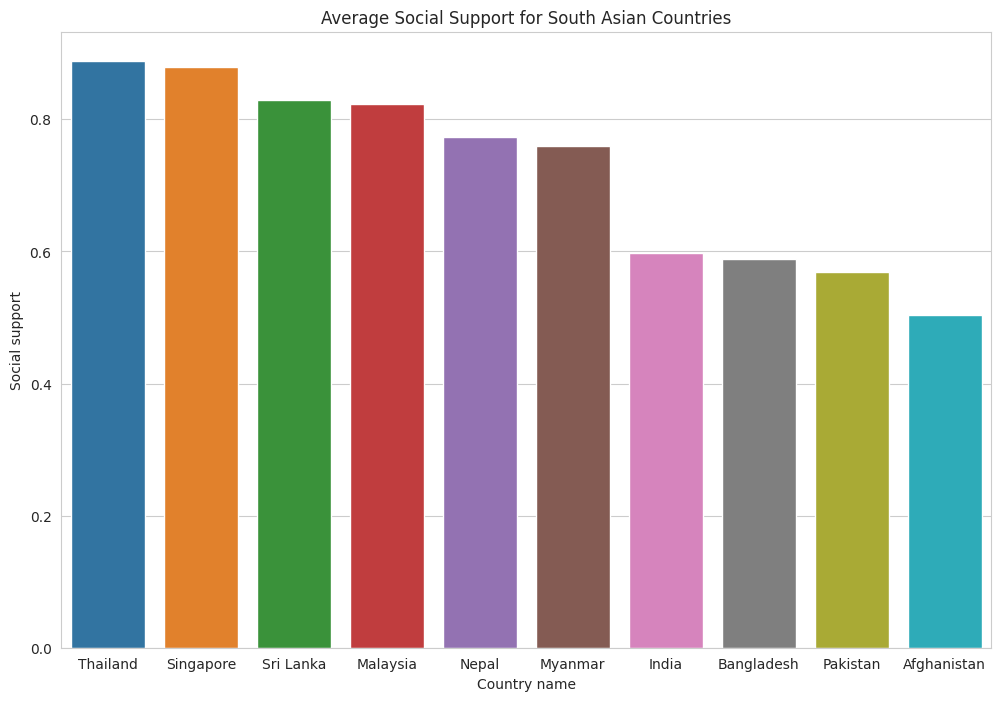

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x="Country name",y="Social support",data=southasia_social_support_mean)
plt.title("Average Social Support for South Asian Countries")
plt.show()

Social support in Pakistan is quite low compared to other countries in South Asia.

### Pakistan's GDP per Capita vs South Asia

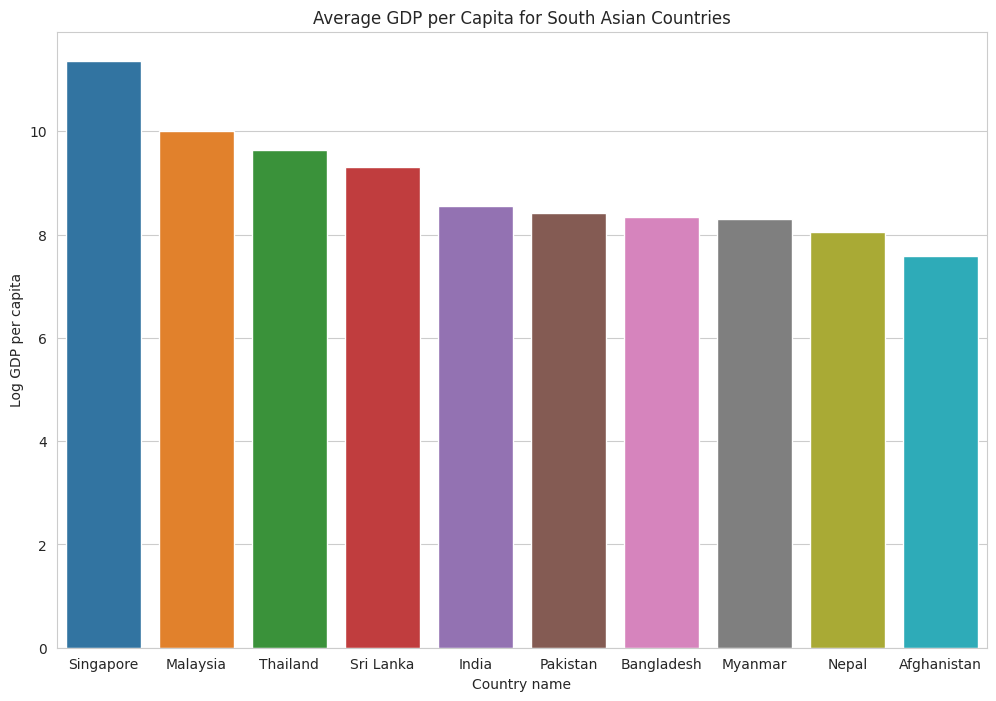

In [55]:

southasia_gdp_mean = calculate_mean_and_sort(df_imputed, "Country name", "Log GDP per capita")

plt.figure(figsize=(12,8))
sns.barplot(x="Country name",y="Log GDP per capita",data=southasia_gdp_mean)
plt.title("Average GDP per Capita for South Asian Countries")
plt.show()

Pakistan is doing relatively okay w.r.t GDP.

### Pakistan's HLE vs South Asia

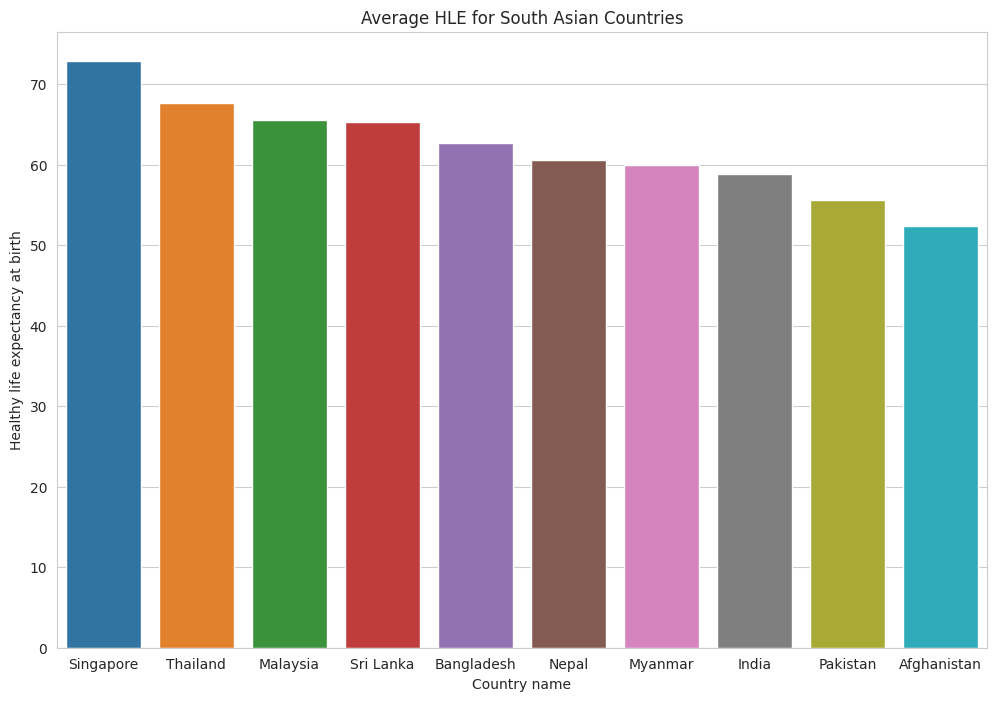

In [59]:
southasia_hle_mean = calculate_mean_and_sort(df_imputed, "Country name", "Healthy life expectancy at birth")

plt.figure(figsize=(12,8))
sns.barplot(x="Country name",y="Healthy life expectancy at birth",data=southasia_hle_mean)
plt.title("Average HLE for South Asian Countries")
plt.show()

### Pakistan's Generosity vs South Asia

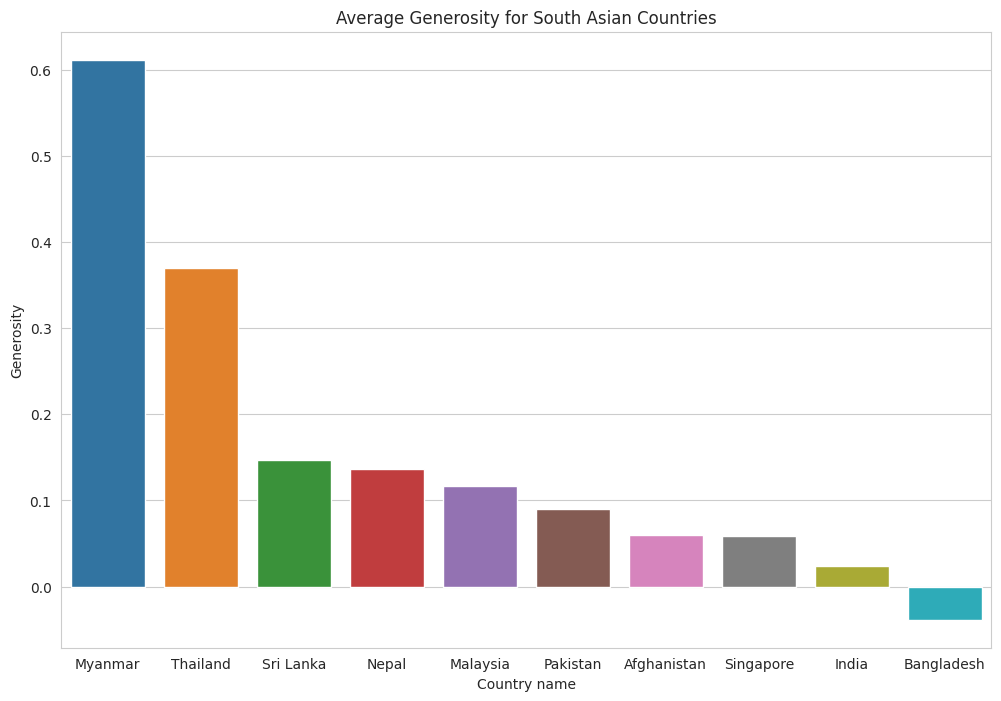

In [61]:
southasia_gen_mean = calculate_mean_and_sort(df_imputed, "Country name", "Generosity")

plt.figure(figsize=(12,8))
sns.barplot(x="Country name",y="Generosity",data=southasia_gen_mean)
plt.title("Average Generosity for South Asian Countries")
plt.show()

Pakistan stands at 6th position out of 10 when it comes to its GDP per capita. It is doing better than almost half of South Asian countries concerning its GDP.


## Conclusion


This dataset allows us to draw several conclusions about the world happiness score for different countries, and south asian countries in particular. Some of these conclusions are that Finland has the highest Happiness Score in the world, while Europe also has a high distribution of Ladder score. Additionally, Pakistan stands at a good position in the Happiness index compared to South Asian countries. It is also doing relatively better than some other South Asian countries in GDP per capita and Generosity, although for other factors our scores are quite low.